<a href="https://colab.research.google.com/github/alexdeividy/projeto_squad3_modulo4/blob/main/Projeto_em_Grupo_Modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos dados de combustíveis de Junho a Julho de 2023 (ANP)**

## Dicionário de Variável
`dados_julho`: DataFrame contendo os dados do mês de Julho.

`dados_junho`: DataFrame contendo os dados do mês de Junho.

`dados`: DataFrame resultante da concatenação dos dados de Junho e Julho.

`dados_gasolina`: DataFrame contendo os dados apenas da Gasolina.

`dados_gasolina_aditivada`: DataFrame contendo os dados apenas da Gasolina Aditivada.

`dados_etanol`: DataFrame contendo os dados apenas do Etanol.

`mgas_c`: Preço médio do Etanol.

`media_de_combustiveis`: Série contendo a média de preço dos combustíveis por tipo.

`df_precos_medios`: DataFrame contendo os preços médios da Gasolina Aditivada por estado.

`df_precos_medios2`: DataFrame contendo os preços médios da Gasolina por estado.

`df_precos_medios3`: DataFrame contendo os preços médios do Etanol por estado.

`aditivada_estados`: Top 5 estados com maior preço médio de Gasolina Aditivada.

`gasolina_estados`: Top 5 estados com maior preço médio de Gasolina.

`etanol_estados`: Top 5 estados com maior preço médio de Etanol.

`preco_etanol_medio`: Preço médio do Etanol por estado.

`preco_gasolina_medio`: Preço médio da Gasolina por estado.

`preco_gasolina_aditivada_medio`: Preço médio da Gasolina Aditivada por estado.

`preco_etanol_medio`: Preço médio do Etanol por estado.

`correlacao_junho`: Correlação entre preço da Gasolina e Etanol para Junho.


`dados_combinados`: DataFrame contendo os dados de Junho e Julho combinados.

`correlacao_bandeira_gasolina`: Correlação entre preço da Gasolina e a Bandeira.

`correlacao_bandeira_etanol`: Correlação entre preço do Etanol e a Bandeira.

`dados_pernambuco`: Dados apenas do estado de Pernambuco.

`dados_saopaulo`: Dados apenas do estado de São Paulo.

`dados_acre`: Dados apenas do estado do Acre.

`concatenated_df`: DataFrame contendo os dados de Gasolina de Pernambuco.
 São Paulo e Acre.



## A análise responde às seguintes perguntas:
1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do
etanol e da gasolina tiveram uma tendência de queda ou diminuição?

2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
11. Extra - Menores preços dos combustíveis, por Revendedor.
12. Comparando preços dos Estados: Pernambuco, São Paulo e Acre, dos últimos 2 meses
13. Menores preços de Gasolina por revendedor nos 3 estados: Pernambuco, São Paulo e Acre.

##Seção de Importação de Bibliotecas:

Nesta seção, as bibliotecas necessárias para a análise de dados são importadas, incluindo:

- Pandas para manipulação de dados,

- NumPy para cálculos numéricos,

- Matplotlib e Seaborn para visualização de gráficos.

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

##Importação de Dados:

Os dados de preços de gasolina e etanol para os meses de junho e julho de 2023 são importados de URLs da ANP (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis) e são armazenados em DataFrames separados para junho e julho. Em seguida, os DataFrames são concatenados em um único DataFrame chamado "dados".

In [ ]:
# Importando dados do mês de Junho
dados_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv", sep=(";"))
# Importando dados do mês de Julho
dados_julho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-07.csv", sep=(";"))

# Concatenando as tabelas
dados = pd.concat([dados_junho, dados_julho,], ignore_index=True)

##Limpeza de Dados:

Nesta parte, algumas cores não relevantes são removidas do DataFrame "dados". A coluna "Valor de Compra" é excluída e a coluna "Complemento" também é excluída. Além disso, a coluna "Valor de Venda" é convertida para tipo float.

In [ ]:
# Resetando o Index do DataFrame dados:
dados.reset_index(0,drop=True,inplace = True)

# Exclusão da coluna Valor de Compra, pois não contém valores
dados.drop('Valor de Compra',axis=1,inplace=True)
# Exclusão da coluna Complemento
dados.drop('Complemento', axis=1, inplace=True)

# Muda os valores da coluna Valor de Venda pra "float"
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.').astype(float)

##Análise Exploratória:

### Aqui começa a análise exploratória dos dados.

Valores Nulos:

- O código calcula a quantidade de valores nulos em cada coluna do DataFrame 'dados' usando o método .isna().sum(). Isso ajuda a identificar quais são os valores ausentes.

In [ ]:
valores_nulos = dados.isna().sum()
valores_nulos

Regiao - Sigla         0
Estado - Sigla         0
Municipio              0
Revenda                0
CNPJ da Revenda        0
Nome da Rua            0
Numero Rua            38
Bairro               224
Cep                    0
Produto                0
Data da Coleta         0
Valor de Venda         0
Unidade de Medida      0
Bandeira               0
dtype: int64

Primeiras 5 Linhas do DataFrame:

- Exibe as primeiras 5 linhas do DataFrame 'dados' utilizando o método .head(). Isso permite uma visualização rápida dos primeiros registros do conjunto de dados.

In [ ]:
# Chamando o DataFrame com suas 5 primeiras linhas
dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,ETANOL,01/06/2023,4.31,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,GASOLINA,01/06/2023,5.39,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,ETANOL,01/06/2023,4.19,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,5.36,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA,01/06/2023,5.29,R$ / litro,VIBRA ENERGIA


Descrição Estatística do Valor de Venda:

- O código utiliza o método .describe()na coluna 'Valor de Venda' do DataFrame dadospara estatísticas descritivas, como média, mediana, mínimo, máximo e quartis, dos valores de venda dos produtos. O .round(2)arredondamento dos valores para duas casas decimais.

In [ ]:
# Utilização do describe para medir dados irreais
dados['Valor de Venda'].describe().round(2)

count    103556.00
mean          5.08
std           0.84
min           2.79
25%           4.49
50%           5.35
75%           5.69
max           8.39
Name: Valor de Venda, dtype: float64

Boxplot para Análise dos Dados Irreais:

- Um boxplot é criado para a coluna 'Valor de Venda' do DataFrame dadosutilizando o método .plot.box(). Isso permite visualizar a distribuição dos dados e identificar possíveis outliers (valores discrepantes). O parâmetro vert=Falseconfigura o boxplot na horizontal, e figsize=(14,2)define o tamanho da figura.

<Axes: >

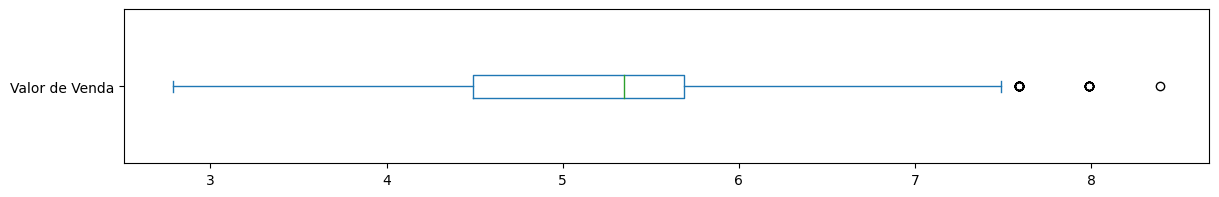

In [ ]:
# Utilização do boxplot para ver melhor dados irreais
dados['Valor de Venda'].plot.box(vert=False, figsize=(14,2))

Criação do DataFrame da Gasolina:

- Um novo DataFrame chamado dados_gasolinaé criado selecionando apenas as linhas do DataFrame dadosonde o produto é 'GASOLINA'. Isso cria um subconjunto de dados contendo informações apenas sobre gasolina.

In [ ]:
# Criação do DataFrame da Gasolina
dados_gasolina = dados[(dados['Produto'] == 'GASOLINA') ]
dados_gasolina.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,GASOLINA,01/06/2023,5.39,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA,01/06/2023,5.29,R$ / litro,VIBRA ENERGIA
6,SE,ES,COLATINA,POSTO BARBADOS LTDA,02.806.627/0001-60,BR 259 KM 46,S/N,BARBADOS,29700-778,GASOLINA,01/06/2023,5.59,R$ / litro,RAIZEN
9,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,05.791.319/0001-04,RODOVIA GETHER LOPES DE FARIAS,2600,CARLOS GERMANO NAUMANN,29705-390,GASOLINA,01/06/2023,5.55,R$ / litro,VIBRA ENERGIA
12,SE,ES,COLATINA,POSTO ARNALDO LTDA,27.495.696/0001-20,AVENIDA SILVIO AVIDOS,"2,331",VILA AMELIA,29706-297,GASOLINA,01/06/2023,5.59,R$ / litro,IPIRANGA


Criação do DataFrame da Gasolina Aditivada:

- Similar ao estágio anterior, um novo DataFrame chamado dados_gasolina_aditivadaé criado selecionando apenas as linhas onde o produto é 'GASOLINA ADITIVADA'.

In [ ]:
# Criação do DataFrame da Gasolina Aditivada
dados_gasolina_aditivada = dados[(dados['Produto'] == 'GASOLINA ADITIVADA') ]
dados_gasolina_aditivada.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,5.36,R$ / litro,VIBRA ENERGIA
5,SE,ES,COLATINA,POSTO BARBADOS LTDA,02.806.627/0001-60,BR 259 KM 46,S/N,BARBADOS,29700-778,GASOLINA ADITIVADA,01/06/2023,5.79,R$ / litro,RAIZEN
8,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,05.791.319/0001-04,RODOVIA GETHER LOPES DE FARIAS,2600,CARLOS GERMANO NAUMANN,29705-390,GASOLINA ADITIVADA,01/06/2023,5.75,R$ / litro,VIBRA ENERGIA
11,SE,ES,COLATINA,POSTO ARNALDO LTDA,27.495.696/0001-20,AVENIDA SILVIO AVIDOS,"2,331",VILA AMELIA,29706-297,GASOLINA ADITIVADA,01/06/2023,5.69,R$ / litro,IPIRANGA
13,SE,ES,COLATINA,POSTO DE GASOLINA SANTO ANTONIO LTDA,27.085.240/0001-92,AVENIDA SILVIO AVIDOS,3251,SANTO ANTONIO,29704-053,GASOLINA ADITIVADA,01/06/2023,5.69,R$ / litro,IPIRANGA


Criação do DataFrame do Etanol:

- Novamente, um novo DataFrame chamado dados_etanolé criado selecionando apenas as linhas onde o produto é 'ETANOL'.

In [ ]:
# Criação do DataFrame do Etanol
dados_etanol = dados[(dados['Produto'] == 'ETANOL') ]
dados_etanol.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,CENTRO,44900-000,ETANOL,01/06/2023,4.31,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,CENTRO,43700-000,ETANOL,01/06/2023,4.19,R$ / litro,VIBRA ENERGIA
7,SE,ES,COLATINA,MOTOCAP COMBUSTIVEIS LTDA,05.791.319/0001-04,RODOVIA GETHER LOPES DE FARIAS,2600,CARLOS GERMANO NAUMANN,29705-390,ETANOL,01/06/2023,4.79,R$ / litro,VIBRA ENERGIA
10,SE,ES,COLATINA,POSTO ARNALDO LTDA,27.495.696/0001-20,AVENIDA SILVIO AVIDOS,"2,331",VILA AMELIA,29706-297,ETANOL,01/06/2023,4.67,R$ / litro,IPIRANGA
15,CO,GO,CATALAO,POSTO CATALAO LTDA,01.128.537/0001-02,RUA DR PEDRO LUDOVICO,309,CENTRO,75700-103,ETANOL,01/06/2023,3.89,R$ / litro,VIBRA ENERGIA


- Essa parte da análise exploratória permite verificar rapidamente os primeiros registros dos dados, identificar a presença de valores nulos, obter estatísticas descritivas sobre o valor de venda dos produtos e visualizar a distribuição desses valores por meio de um boxplot. Além disso, os DataFrames separados são criados para permitir análises mais específicas sobre cada tipo de combustível.






## Perguntas

Análise 1:

- Variação de Preço dos Combustíveis nos meses de Junho e Julho:
Um gráfico de linha é criado para mostrar a variação de preço médio dos combustíveis (Gasolina, Gasolina Aditivada e Etanol) nos meses de junho e julho.

### 1. **Comportamento dos preços dos combustíveis durante os dois meses de Junho e Julho**

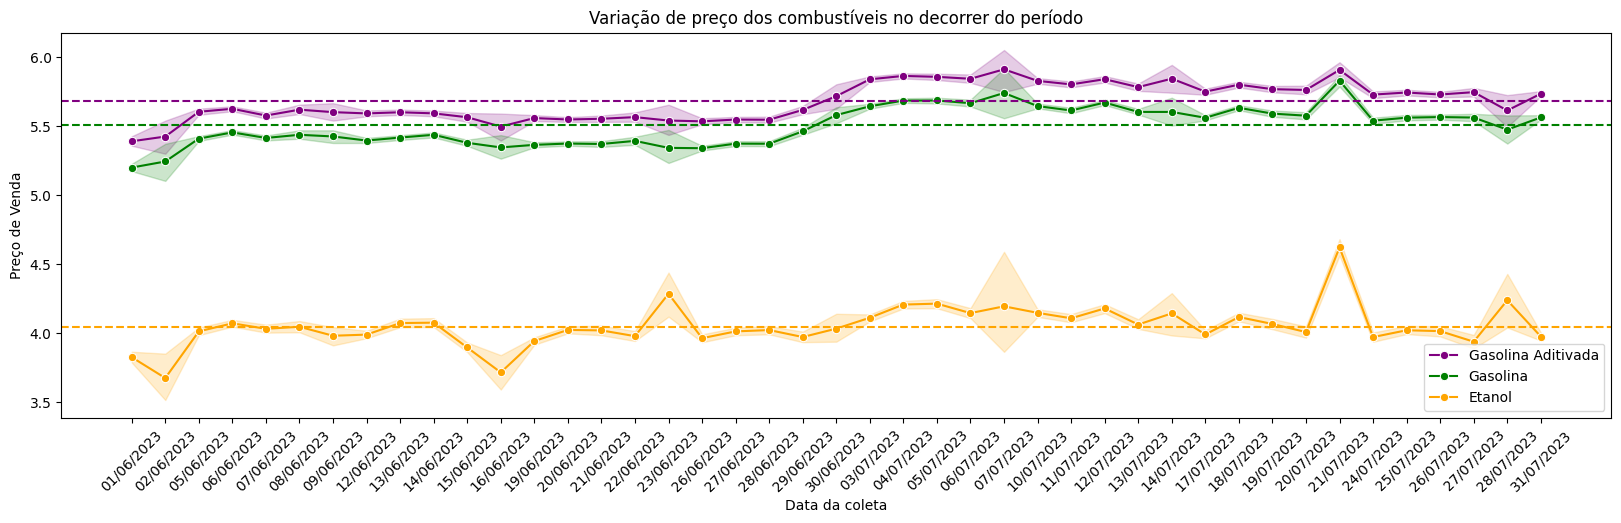

In [ ]:
# Criação do gráfico que mostra a variação de preço dos combustíveis nos meses de Junho e Julho

mgas_c = dados_gasolina['Valor de Venda'].mean() # Preço médio da gasolina comum
mgas_a = dados_gasolina_aditivada['Valor de Venda'].mean() # Preço médio da gasolina aditivada
metan = dados_etanol['Valor de Venda'].mean() # Preço médio do etanol

plt.figure(figsize=(20,5))
sns.lineplot(data=dados_gasolina_aditivada, x='Data da Coleta', y='Valor de Venda', marker='o', color='purple', label='Gasolina Aditivada')
sns.lineplot(data=dados_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina')
sns.lineplot(data=dados_etanol, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Etanol')
plt.axhline(mgas_c, color='g',linestyle='--')
plt.axhline(mgas_a, color='purple',linestyle='--')
plt.axhline(metan, color='orange',linestyle='--')
plt.xlabel('Data da coleta')
plt.ylabel('Preço de Venda')
plt.title('Variação de preço dos combustíveis no decorrer do período')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Análise 2:

- Preço Médio dos Combustíveis nos Últimos 2 Meses:
Um gráfico de barras é criado para comparar o preço médio dos combustíveis nos últimos dois meses.

###2. Preço médio da gasolina e do etanol

In [ ]:
# Agrupa os combustíveis e faz uma média dos valores
media_de_combustiveis = dados.groupby('Produto')['Valor de Venda'].mean()
media_de_combustiveis.round(2)

Produto
ETANOL                4.04
GASOLINA              5.51
GASOLINA ADITIVADA    5.69
Name: Valor de Venda, dtype: float64

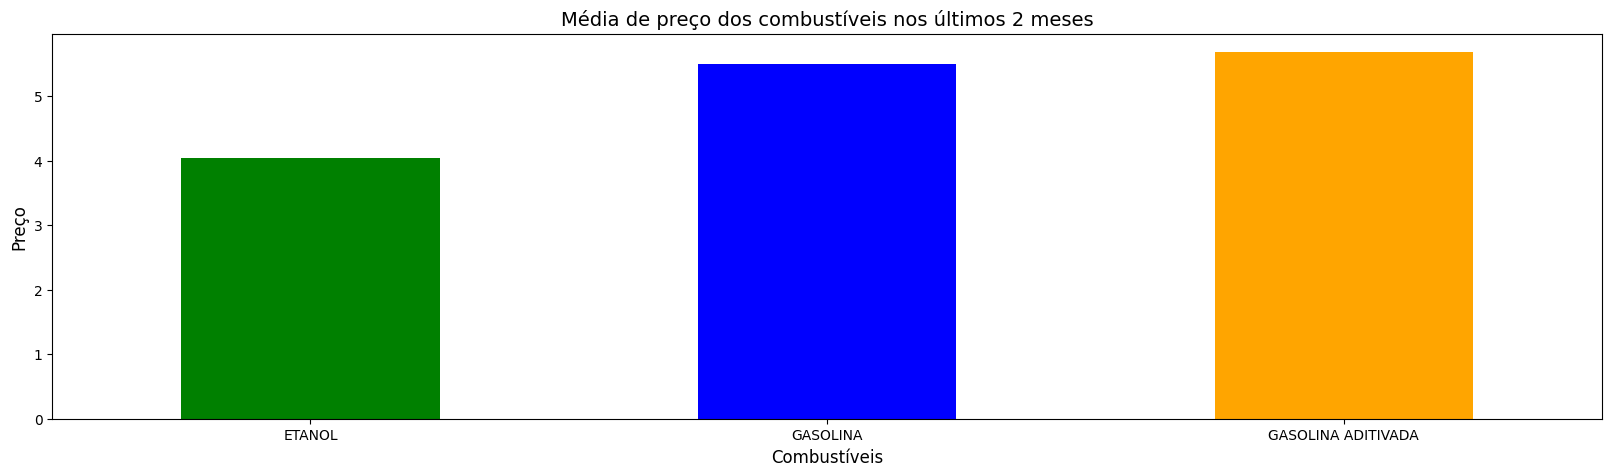

In [ ]:
# calculando a média
media_de_combustiveis = dados.groupby('Produto')['Valor de Venda'].mean()

#criação do gráfico de barras
media_de_combustiveis.plot(kind='bar', figsize=(20,5), rot=0, color=['green', 'blue', 'orange'])
plt.title('Média de preço dos combustíveis nos últimos 2 meses', fontsize = 14)
plt.ylabel('Preço', fontsize = 12)
plt.xlabel('Combustíveis', fontsize = 12)
plt.show()

Análise 3:

- Preço Médio mais Caro por Estado para Gasolina e Etanol:
Gráficos de barras são criados para mostrar os 5 estados com os preços médios mais caros para gasolina, gasolina aditivada e etanol.

### **3. Os 5 estados com o preço médio da gasolina e do etanol mais caros**

In [ ]:
# Calcular os preços médios por estado para gasolina, etanol e gasolina aditivada
media_gasolina_aditivada = dados_gasolina_aditivada.groupby('Estado - Sigla')['Valor de Venda'].mean()
media_gasolina = dados_gasolina.groupby('Estado - Sigla')['Valor de Venda'].mean()
media_etanol = dados_etanol.groupby('Estado - Sigla')['Valor de Venda'].mean()

# Criar um DataFrame com os preços médios por estado
df_precos_medios = pd.DataFrame({
    'Aditivada': media_gasolina_aditivada})
df_precos_medios2 = pd.DataFrame({
    'Gasolina': media_gasolina})
df_precos_medios3 = pd.DataFrame({
    'Etanol': media_etanol})

aditivada_estados = df_precos_medios.sort_values(by='Aditivada', ascending = False).head(5)
gasolina_estados = df_precos_medios2.sort_values(by='Gasolina', ascending = False).head(5)
etanol_estados = df_precos_medios3.sort_values(by='Etanol', ascending = False).head(5)
print(aditivada_estados,'\n')
print(gasolina_estados,'\n')
print(etanol_estados)

                Aditivada
Estado - Sigla           
AC               6.304203
AM               6.278139
RO               6.095025
RR               5.920444
TO               5.903172 

                Gasolina
Estado - Sigla          
AC              6.339545
AM              6.314297
RO              6.016365
RR              5.842083
TO              5.793946 

                  Etanol
Estado - Sigla          
AP              5.246667
RR              5.115517
RO              5.012737
RS              4.839457
AC              4.809221


 Análise 4:

Preço Médio do Etanol, Gasolina e Gasolina Aditivada por Estado:
Gráficos de barras são criados para mostrar o preço médio do etanol, gasolina e gasolina aditivada pelo estado.

### **4. Preço médio do Etanol da Gasolina e Gasolina Aditivada por Estado (BR)**

Cálculo do Preço Médio do Etanol por Estado:

- O código filtra as linhas do DataFrame dadosonde o produto é 'ETANOL' e, em seguida, agrupa os dados pelo estado (coluna 'Estado - Sigla') e calcula o preço médio de venda usando o método .mean(). O resultado é arredondado para 2 casas decimais com o .round(2). Isso cria a variável preco_etanol_medio

Criação do Gráfico de Barras para o Preço Médio do Etanol por Estado:

- Um gráfico de barras é criado usando o método .plot(kind='bar')com os valores de preco_etanol_medio. As barras representam o preço médio do etanol por estado nos últimos dois meses. A largura das barras é controlada pela configuração rot=0(sem rotação) e os núcleos são definidos aleatoriamente para cada barra.

Exibição do Gráfico de Etanol:

- plt.show()é usado para exibir o gráfico de barras que mostra o preço médio do etanol por estado nos últimos dois meses.

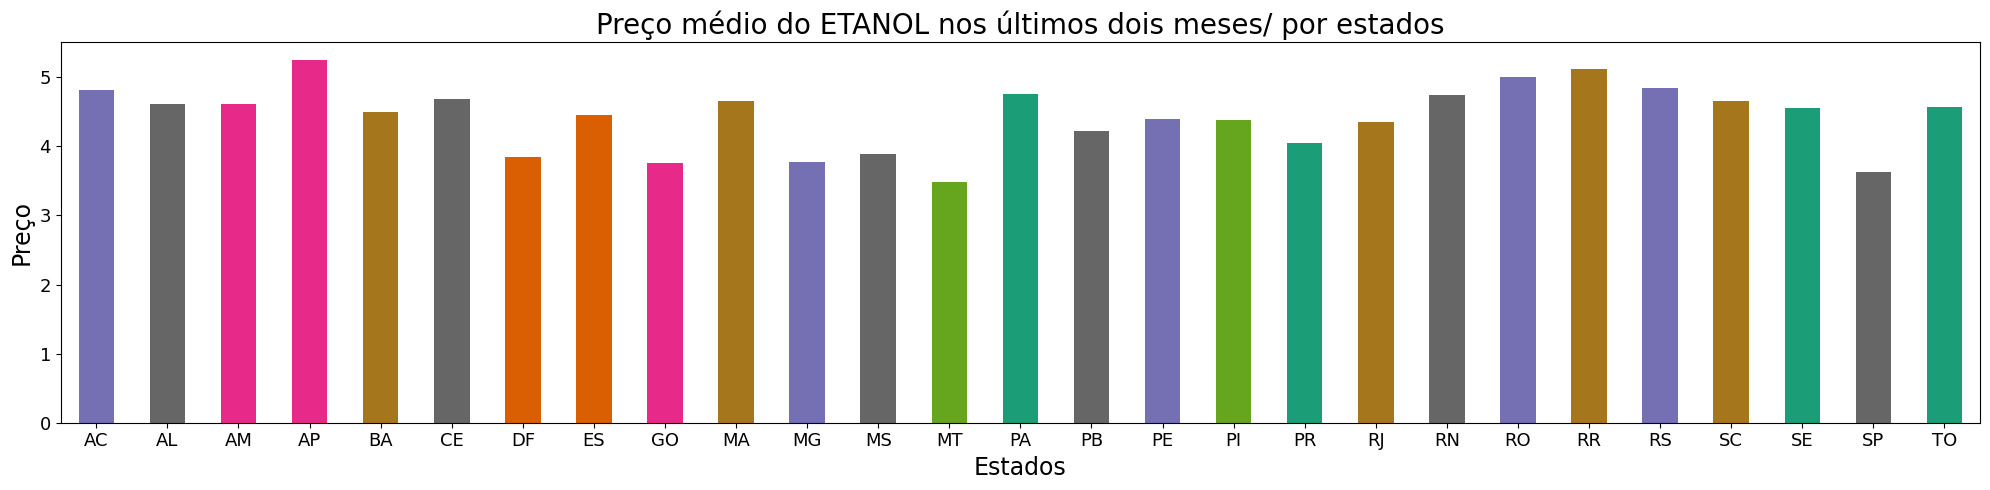

In [ ]:
preco_etanol_medio = dados[dados['Produto'] == 'ETANOL'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]
data = np.random.rand(num_columns) * 30  # Dados aleatórios

fig, ax = plt.subplots(figsize=(20, 5))
preco_etanol_medio.plot(kind='bar', rot=0, fontsize = 13, color= colors)

plt.title('Preço médio do ETANOL nos últimos dois meses/ por estados', fontsize = 20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.tight_layout()
plt.show()

Cálculo do Preço Médio da Gasolina por Estado:

- semelhante ao passo anterior, este trecho de código calcula o preço médio de venda da gasolina por estado, criando uma variável preco_gasolina_medio.

Criação do Gráfico de Barras para o Preço Médio da Gasolina por Estado:

- Criação do gráfico de barras para o preço médio da gasolina por estado, utilizando a variável preco_gasolina_medio.

Configuração do Título e Rótulos do Gráfico de Gasolina:

- Definição do título, etiquetas dos eixos xey, bem como ajuste do layout do gráfico de gasolina.

Exposição do Gráfico de Gasolina:

- Exibição do gráfico de barras que mostra o preço médio da gasolina por estado nos últimos dois meses.

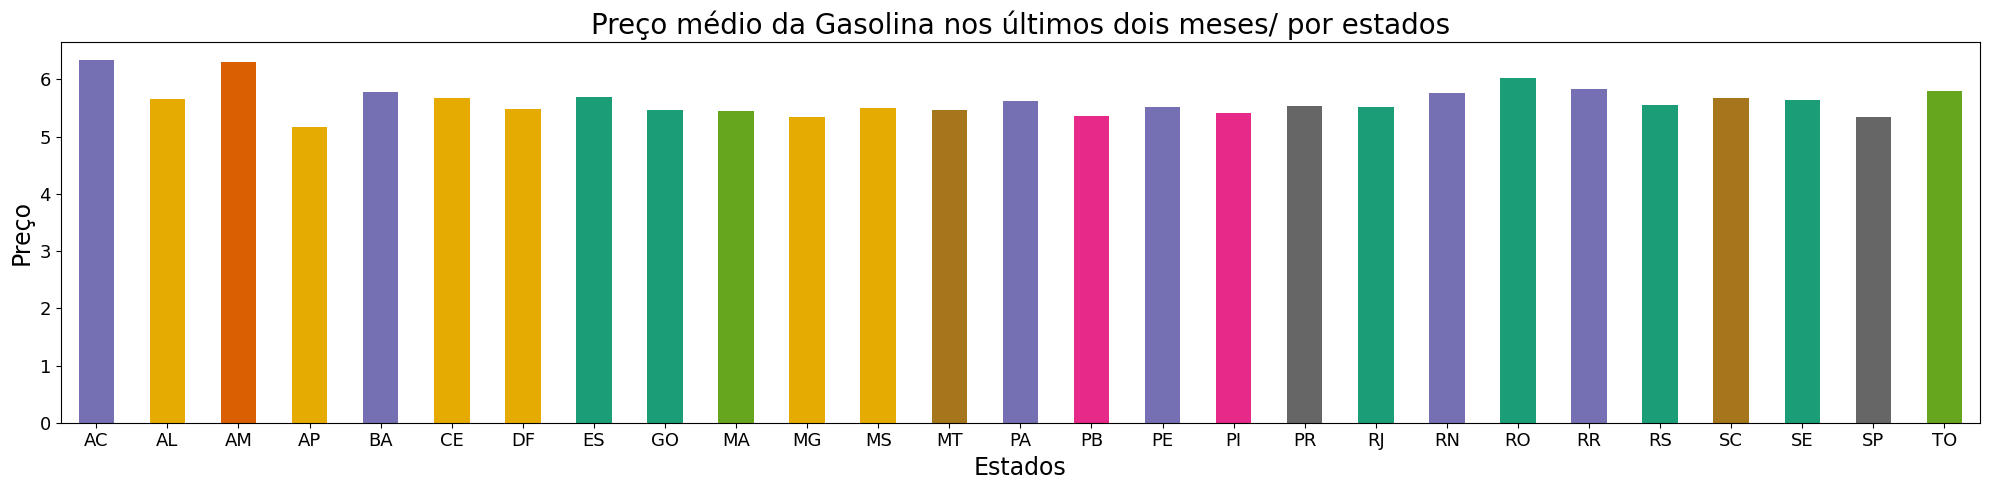

In [ ]:
preco_gasolina_medio = dados[dados['Produto'] == 'GASOLINA'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]
data = np.random.rand(num_columns) * 30  # Dados aleatórios

fig, ax = plt.subplots(figsize=(20, 5))
preco_gasolina_medio.plot(kind='bar', rot=0, fontsize = 13, color=colors)

plt.title('Preço médio da Gasolina nos últimos dois meses/ por estados', fontsize =20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.tight_layout()
plt.show()

Cálculo do Preço Médio da Gasolina Aditivada por Estado:

- semelhante aos passos anteriores, este trecho calcula o preço médio de venda da gasolina aditivada por estado, criando uma variável preco_gasolina_aditivada_medio.

Criação do Gráfico de Barras para o Preço Médio da Gasolina Aditivada por Estado:

- Criação do gráfico de barras para o preço médio da gasolina aditivada pelo estado, utilizando a variável preco_gasolina_aditivada_medio.

Configuração do Título e Rótulos do Gráfico de Gasolina Aditivada:

- Definição do título, etiquetas dos eixos xey, bem como ajuste do layout do gráfico de gasolina aditivada.

Exibição do Gráfico de Gasolina Aditivada:

- Exibição do gráfico de barras que mostra o preço médio da gasolina aditivada pelo estado nos últimos dois meses.

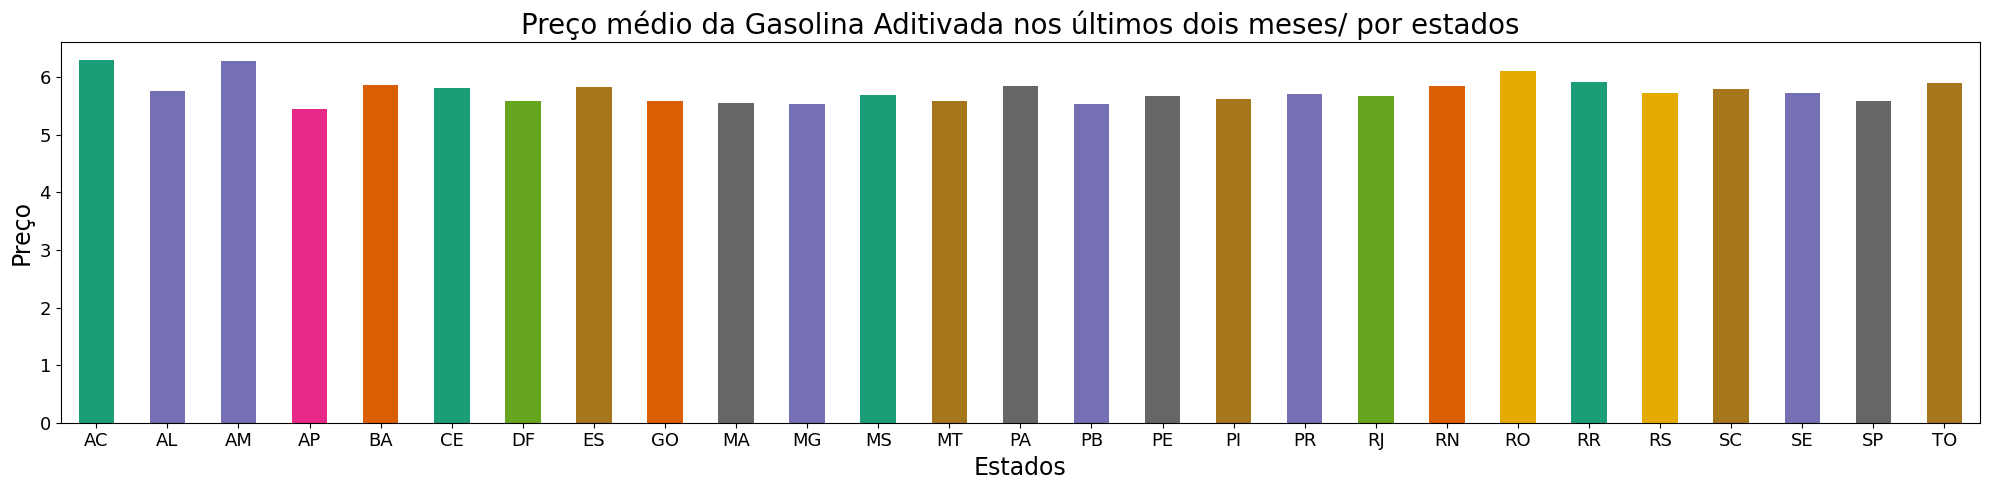

In [ ]:
preco_gasolina_aditivada_medio = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Estado - Sigla')['Valor de Venda'].mean().round(2)
# print(preco_gasolina_aditivada_medio.min())
# print(preco_gasolina_aditivada_medio.max())
# print(preco_gasolina_aditivada_medio.mean())
# print(preco_gasolina_aditivada_medio)

num_columns = 27  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)]
data = np.random.rand(num_columns) * 100  # Dados aleatórios

fig, ax = plt.subplots(figsize=(20, 5))
preco_gasolina_aditivada_medio.plot(kind='bar', rot=0, fontsize = 13, color=colors)

plt.title('Preço médio da Gasolina Aditivada nos últimos dois meses/ por estados', fontsize = 20)
plt.xlabel('Estados', fontsize = 17)
plt.ylabel('Preço', fontsize = 17)
plt.tight_layout()
plt.show()

O código
- Essa parte do código realiza análises comparativas dos preços médios do etanol, gasolina e gasolina aditivada pelo estado, apresentando os resultados em gráficos de barras.







Análise 5:

- Menor Preço por Município para Gasolina e Etanol:
Gráfico de barras é criado para mostrar ao município com menor preço para e etanol.

### **5. Município que possui o menor preço para a gasolina e o etanol**

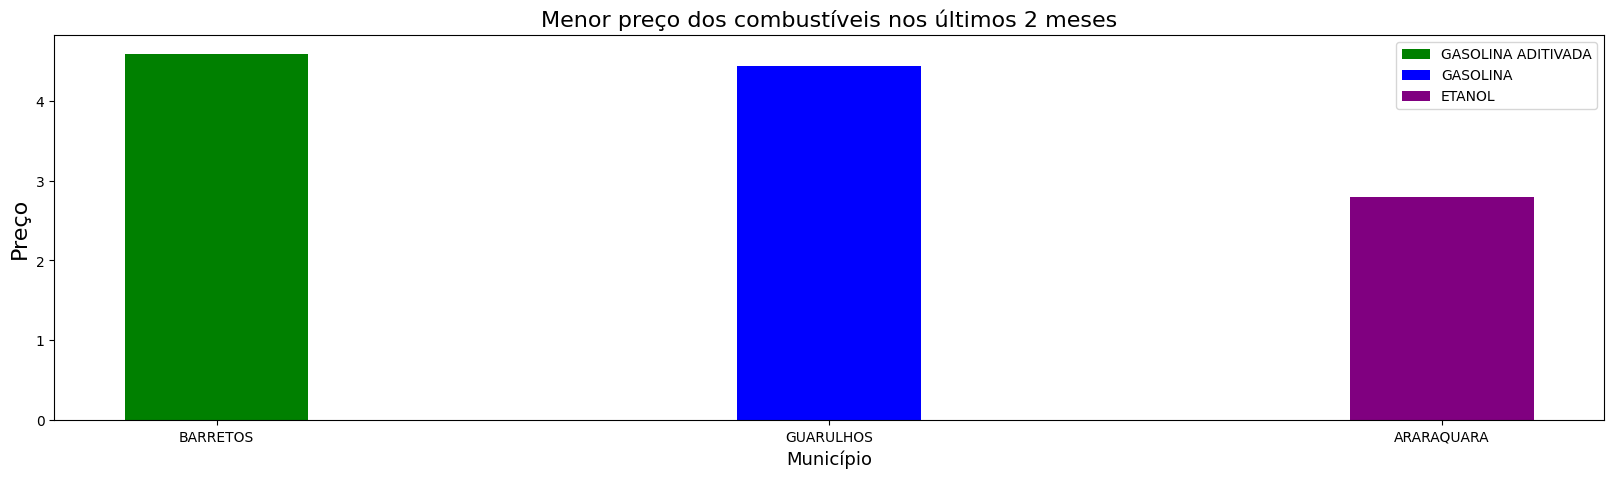

In [ ]:
# gráficos e legendas
fig, ax = plt.subplots(figsize=(20,5));
plt.xlabel('Município', fontsize=13)
plt.ylabel('Preço', fontsize=16)
plt.title('Menor preço dos combustíveis nos últimos 2 meses', fontsize=16)

# Atribuindo os dados da Gasolina aditivada
gasolina_aditivada_menor = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio = gasolina_aditivada_menor.idxmin() # Buscando os valores
valor_menor = gasolina_aditivada_menor.min()
plt.bar(menor_municipio, valor_menor, color='green', width=0.3, label = 'GASOLINA ADITIVADA') # criação da barra

# Atribuindo os dados da Gasolina
gasolina_menor = dados[dados['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio2 = gasolina_menor.idxmin() # Buscando os valores
valor_menor2 = gasolina_menor.min()
plt.bar(menor_municipio2, valor_menor2, color='blue', width=0.3, label = 'GASOLINA') # criação da barra

# Atribuindo os dados do Etanol
etanol_menor = dados[dados['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].min()
menor_municipio3 = etanol_menor.idxmin() # Buscando os valores
valor_menor3 = etanol_menor.min()
plt.bar(menor_municipio3, valor_menor3, color='purple', width=0.3, label = 'ETANOL') # criação da barra

# Mostra o Gráfico
plt.legend()
plt.show()

Análise 6:

- Maior Preço por Município para Gasolina e Etanol:
Gráfico de barras é criado para mostrar o município com maior preço para e etanol.

### **6. Município que possui o maior preço para a gasolina e o etanol**

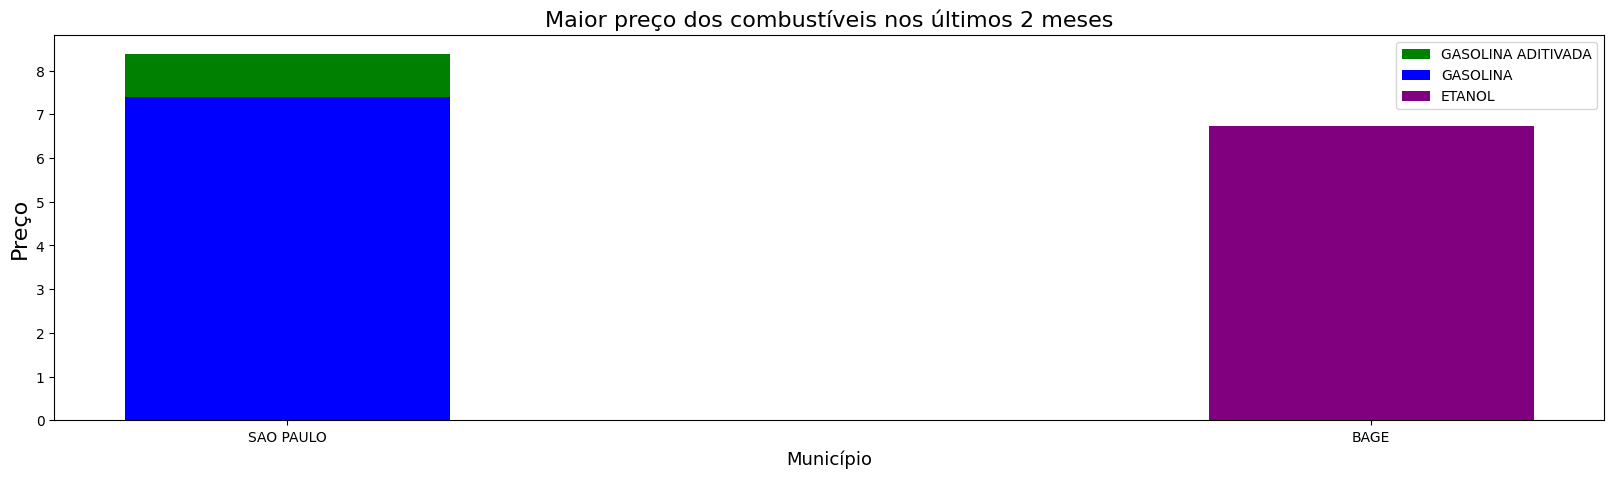

In [ ]:
# Gráficos e legendas
fig, ax = plt.subplots(figsize=(20,5));
plt.xlabel('Município', fontsize=13)
plt.ylabel('Preço', fontsize=16)
plt.title('Maior preço dos combustíveis nos últimos 2 meses', fontsize=16)

# Atribuindo os dados da Gasolina aditivada
gasolina_aditivada_maior = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio = gasolina_aditivada_maior.idxmax() # Buscando os valores
valor_maior = gasolina_aditivada_maior.max()
plt.bar(maior_municipio, valor_maior, color='green', width=0.3, label = 'GASOLINA ADITIVADA') # criação da barra

# Atribuindo os dados da Gasolina
gasolina_maior = dados[dados['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio2 = gasolina_maior.idxmax() # Buscando os valores
valor_maior2 = gasolina_maior.max()
plt.bar(maior_municipio2, valor_maior2, color='blue', width=0.3, label = 'GASOLINA') # criação da barra

# Atribuindo os dados do Etanol
etanol_maior = dados[dados['Produto'] == 'ETANOL'].groupby('Municipio')['Valor de Venda'].max()
maior_municipio3 = etanol_maior.idxmax() # Buscando os valores
valor_maior3 = etanol_maior.max()
plt.bar(maior_municipio3, valor_maior3, color='purple', width=0.3, label = 'ETANOL') # criação da barra

# Mostra o gráfico
plt.legend()
plt.show()

Análise 7:

- Maior Valor Médio da Gasolina por Região:
Gráfico de barras é criado para mostrar a região com o maior valor médio da gasolina.

### **7. A região que possui o maior valor médio da gasolina?**

Cálculo do Preço Médio da Gasolina por Região:

- O código filtra as linhas do DataFrame dadosonde o produto é 'GASOLINA' e, em seguida, agrupa os dados pela coluna 'Região - Sigla' (região) e calcula o preço médio de venda usando o método .mean(). O resultado é arredondado para 2 casas decimais com o .round(2). Isso cria a variável media_por_regiao.

Criação do Gráfico de Barras para o Preço Médio da Gasolina por Região:

- Um gráfico de barras é criado usando o método .plot(kind='bar')com os valores de media_por_regiao. As barras representam o preço médio da gasolina por região. A largura das barras é controlada pela configuração rot=0(sem rotação) e os núcleos são atribuídos aleatoriamente para cada barra.

Configuração do Título e Rótulos do Gráfico de Gasolina:

- O título do gráfico é definido usando plt.title()o texto 'Preço médio da gasolina'. Os rótulos dos eixos xey são definidos com plt.xlabel()e plt.ylabel(), respectivamente.

Exposição do Gráfico de Gasolina:

- plt.show()é usado para exibir o gráfico de barras que mostra o preço médio da gasolina por região.



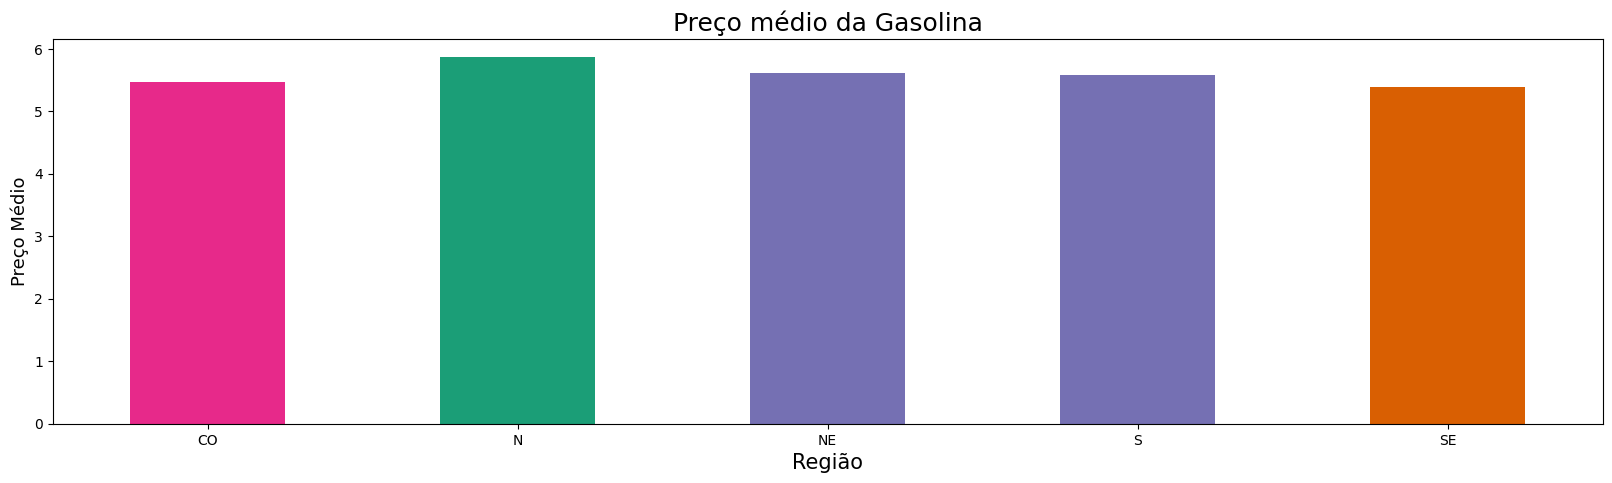

In [ ]:
# Atribuindo os dados da Gasolina
media_por_regiao = dados[dados['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors
data = np.random.rand(num_columns) *5  # Dados aleatórios

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(20, 5))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

plt.title('Preço médio da Gasolina', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()

Cálculo do Preço Médio da Gasolina Aditivada por Região:

- semelhante ao passo anterior, este trecho de código calcula o preço médio de venda da gasolina aditivada por região, criando uma variável media_por_regiao.

Criação do Gráfico de Barras para o Preço Médio da Gasolina Aditivada por Região:

- Criação do gráfico de barras para o preço médio da gasolina aditivada por região, utilizando a variável media_por_regiao.

Configuração do Título e Rótulos do Gráfico de Gasolina Aditivada:

- Definição do título, etiquetas dos eixos xey, bem como ajuste do layout do gráfico de gasolina aditivada.

Exibição do Gráfico de Gasolina Aditivada:

- Exibição do gráfico de barras que mostra o preço médio da gasolina aditivada por região.

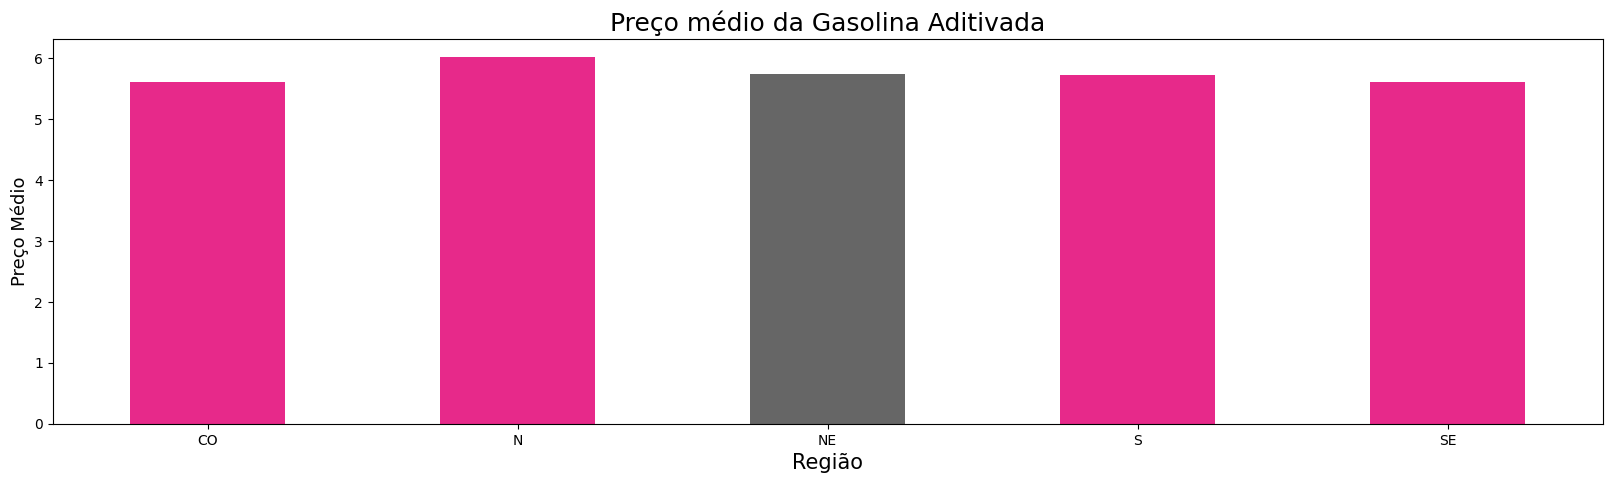

In [ ]:
# Atribuindo os dados da Gasolina Aditivada
media_por_regiao = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors
data = np.random.rand(num_columns) * 5  # Dados aleatórios

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(20, 5))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

plt.title('Preço médio da Gasolina Aditivada', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()

O código
- Essa parte do código realiza uma análise comparativa dos valores médios da gasolina e da gasolina aditivada por região, apresentando os resultados em gráficos de barras. Os gráficos permitem identificar qual região possui o maior valor médio para esses produtos.

Análise 8:

- Menor Valor Médio do Etanol por Região:
Gráfico de barras é criado para mostrar a região com o menor valor médio do etanol.


### **8. Região que possui o menor valor médio do etanol**

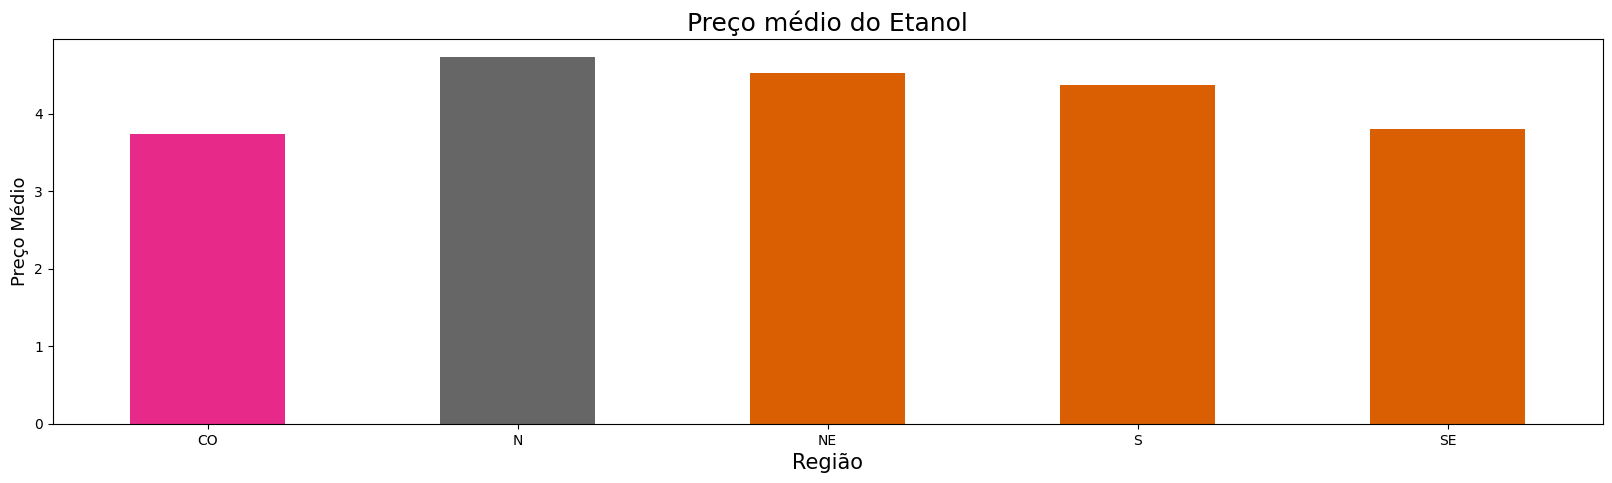

In [ ]:
# Atribuindo os dados do Etanol
media_por_regiao = dados[dados['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean().round(2)

num_columns = 5  # Número de colunas no gráfico
colors = [plt.cm.Dark2(random.random()) for _ in range(num_columns)] # atribuindo cores aleatórias na variável colors
data = np.random.rand(num_columns) * 5  # Dados aleatórios

# Gráfico e legendas
fig, ax = plt.subplots(figsize=(20, 5))
media_por_regiao.plot(kind='bar', rot=0, color=colors)

plt.title('Preço médio do Etanol', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio', fontsize=13)
plt.show()

###**9. Correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido**

In [ ]:
print(dados_combinados.columns)


Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira', 'Media Compra/Venda'],
      dtype='object')


In [ ]:
# Filtrar os dados de gasolina e etanol para junho
gasolina_junho = dados_combinados.loc['Junho'][dados_combinados.loc['Junho']['Produto'].str.contains('GASOLINA', case=False)]
etanol_junho = dados_combinados.loc['Junho'][dados_combinados.loc['Junho']['Produto'].str.contains('ETANOL', case=False)]

# Filtrar os dados de gasolina e etanol para julho
gasolina_julho = dados_combinados.loc['Julho'][dados_combinados.loc['Julho']['Produto'].str.contains('GASOLINA', case=False)]
etanol_julho = dados_combinados.loc['Julho'][dados_combinados.loc['Julho']['Produto'].str.contains('ETANOL', case=False)]

# Calcular a correlação entre gasolina e etanol para junho
correlacao_junho = gasolina_junho['Media Compra/Venda'].corr(etanol_junho['Media Compra/Venda'])

# Calcular a correlação entre gasolina e etanol para julho
correlacao_julho = gasolina_julho['Media Compra/Venda'].corr(etanol_julho['Media Compra/Venda'])

print("Correlação entre Gasolina e Etanol para Junho:", correlacao_junho)
print("Correlação entre Gasolina e Etanol para Julho:", correlacao_julho)


Correlação entre Gasolina e Etanol para Junho: nan
Correlação entre Gasolina e Etanol para Julho: nan


### **10. Correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele**

In [ ]:
# Função para substituir vírgulas por pontos e converter para valores numéricos
def convert_to_numeric(value):
    try:
        return float(value.replace(',', '.'))
    except:
        return value

# Aplicar a função de conversão aos valores numéricos
dados_junho['Valor de Compra'] = dados_junho['Valor de Compra'].apply(convert_to_numeric)
dados_junho['Valor de Venda'] = dados_junho['Valor de Venda'].apply(convert_to_numeric)

dados_julho['Valor de Compra'] = dados_julho['Valor de Compra'].apply(convert_to_numeric)
dados_julho['Valor de Venda'] = dados_julho['Valor de Venda'].apply(convert_to_numeric)

# Combinar os DataFrames usando concatenação
dados_combinados = pd.concat([dados_junho, dados_julho], keys=['Junho', 'Julho'])

# Calcular a média entre Valor de Compra e Valor de Venda
dados_combinados['Media Compra/Venda'] = (dados_combinados['Valor de Compra'] + dados_combinados['Valor de Venda']) / 2

# Calculando a correlação entre valor do combustível e a bandeira
correlacao_bandeira_gasolina = dados_combinados.loc[dados_combinados['Produto'] == 'GASOLINA', 'Media Compra/Venda'].corr(dados_combinados['Bandeira'])
correlacao_bandeira_etanol = dados_combinados.loc[dados_combinados['Produto'] == 'ETANOL', 'Media Compra/Venda'].corr(dados_combinados['Bandeira'])

print("Correlação entre Valor do Combustível (Gasolina) e Bandeira:", correlacao_bandeira_gasolina)
print("Correlação entre Valor do Combustível (Etanol) e Bandeira:", correlacao_bandeira_etanol)


Correlação entre Valor do Combustível (Gasolina) e Bandeira: nan
Correlação entre Valor do Combustível (Etanol) e Bandeira: nan


##Análises Extras:

- Essas análises incluem comparações entre estados específicos (Pernambuco, São Paulo e Acre) e preços menores de gasolina por comércio nos três estados.

### **11. Menores preços dos combustíveis, por Revendedor**

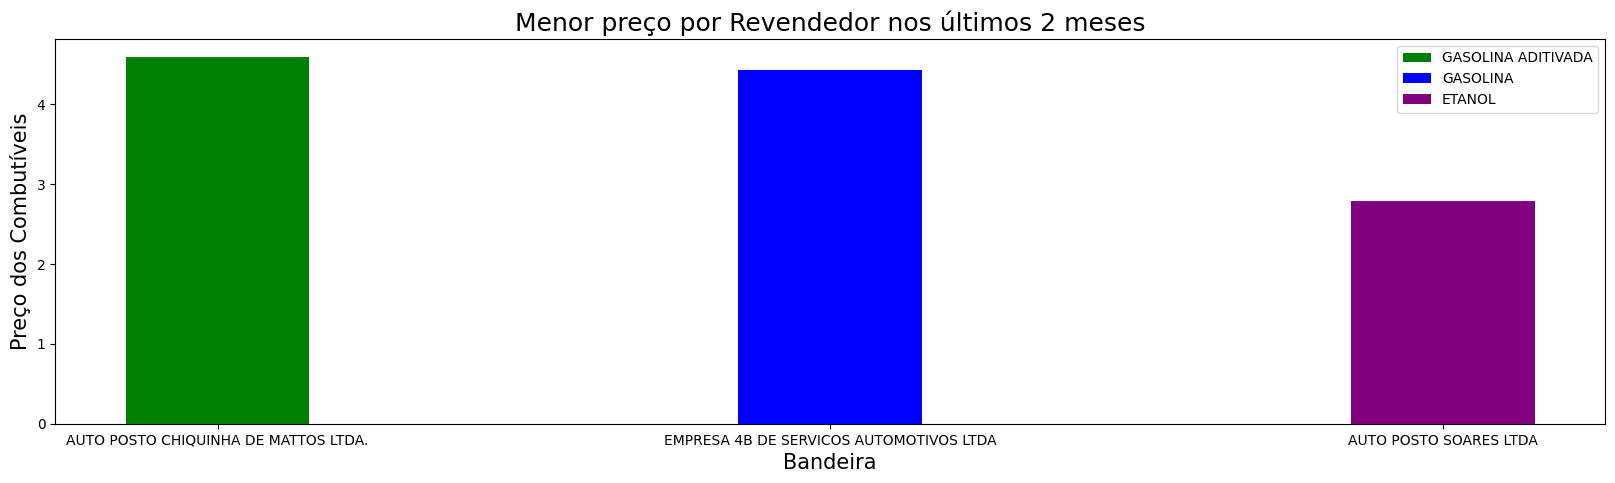

In [ ]:
# Gráficos e legendas
fig, ax = plt.subplots(figsize=(20, 5));
plt.xlabel('Bandeira', fontsize = 15)
plt.ylabel('Preço dos Combutíveis', fontsize = 15)
plt.title('Menor preço por Revendedor nos últimos 2 meses', fontsize = 18)

# Atribuindo os dados da Gasolina Aditivada
menor_aditivada_revenda = dados[dados['Produto'] == 'GASOLINA ADITIVADA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda = menor_aditivada_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_aditivada = menor_aditivada_revenda.min()
plt.bar(menor_preco_revenda, menor_preco_aditivada, color='green', width=0.3, label = 'GASOLINA ADITIVADA') # Criação da barra

# Atribuindo os dados da Gasolina
menor_gasolina_revenda = dados[dados['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda2 = menor_gasolina_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina = menor_gasolina_revenda.min()
plt.bar(menor_preco_revenda2, menor_preco_gasolina, color='blue', width=0.3, label = 'GASOLINA') # Criação da barra

# Atribuindo os dados da Gasolina
menor_etanol_revenda= dados[dados['Produto'] == 'ETANOL'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda3 = menor_etanol_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_etanol = menor_etanol_revenda.min()
plt.bar(menor_preco_revenda3, menor_preco_etanol, color='purple', width=0.3, label = 'ETANOL') # Criação da barra

plt.legend()
plt.show()

### **12. Comparação dos preços dos Estados: Pernambuco, São Paulo e Acre, dos últimos 2 meses**

In [ ]:
# Filtrando os dados apenas de 3 estados
dados_pernambuco = dados[dados['Estado - Sigla'] == 'PE']
dados_pernambuco.reset_index(0,drop=True,inplace = True)
dados_pernambuco_gasolina = dados_pernambuco[(dados_pernambuco['Produto'] == 'GASOLINA') ]

dados_saopaulo = dados[dados['Estado - Sigla'] == 'SP']
dados_saopaulo.reset_index(0,drop=True,inplace = True)
dados_saopaulo_gasolina = dados_saopaulo[(dados_saopaulo['Produto'] == 'GASOLINA') ]

dados_acre = dados[dados['Estado - Sigla'] == 'AC']
dados_acre.reset_index(0,drop=True,inplace = True)
dados_acre_gasolina = dados_acre[(dados_acre['Produto'] == 'GASOLINA') ]

concatenated_df = pd.concat([dados_pernambuco_gasolina, dados_saopaulo_gasolina, dados_acre_gasolina], ignore_index=True)
concatenated_df.describe()

,Valor de Venda
count,12316.000000
mean,5.378650
std,0.389603
min,4.430000
25%,5.140000
50%,5.360000
75%,5.570000
max,7.390000


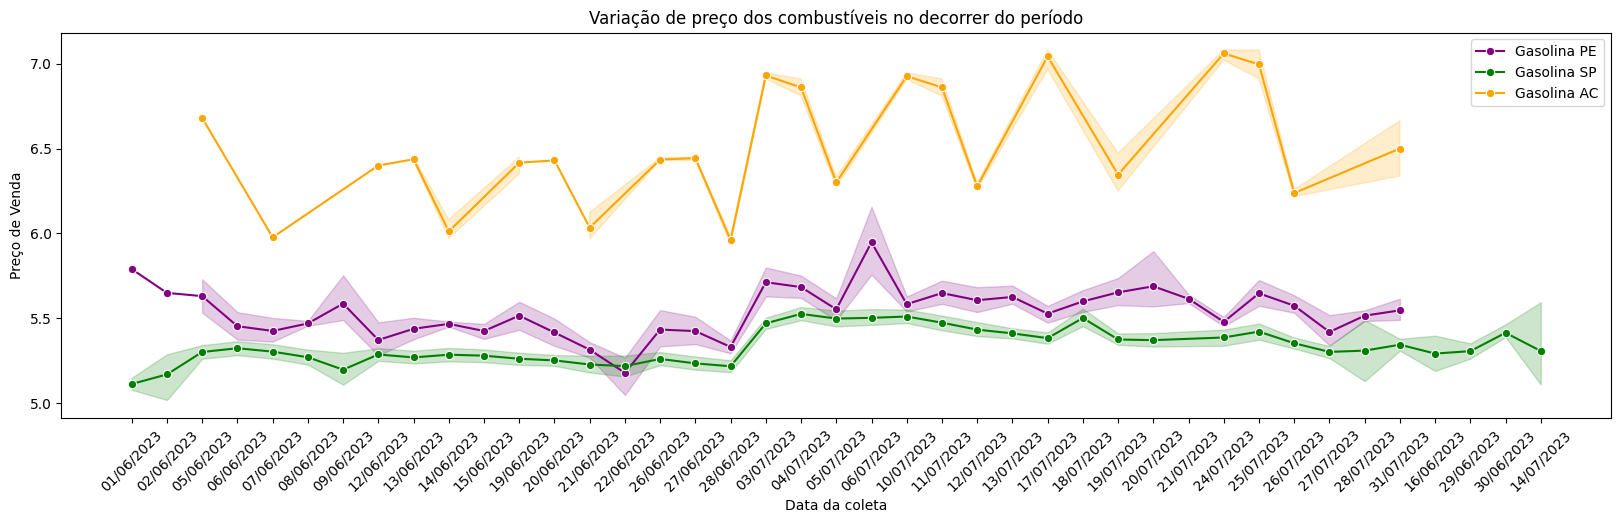

In [ ]:
# Criação do gráfico que mostra a variação de preço dos combustíveis nos meses de Junho e Julho

plt.figure(figsize=(20,5))
sns.lineplot(data=dados_pernambuco_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='purple', label='Gasolina PE')
sns.lineplot(data=dados_saopaulo_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='green', label='Gasolina SP')
sns.lineplot(data=dados_acre_gasolina, x='Data da Coleta', y='Valor de Venda', marker='o', color='orange', label='Gasolina AC')
plt.xlabel('Data da coleta')
plt.ylabel('Preço de Venda')
plt.title('Variação de preço dos combustíveis no decorrer do período')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### **13. Menores preços de Gasolina por revendedor nos 3 estados: Pernambuco, São Paulo e Acre**

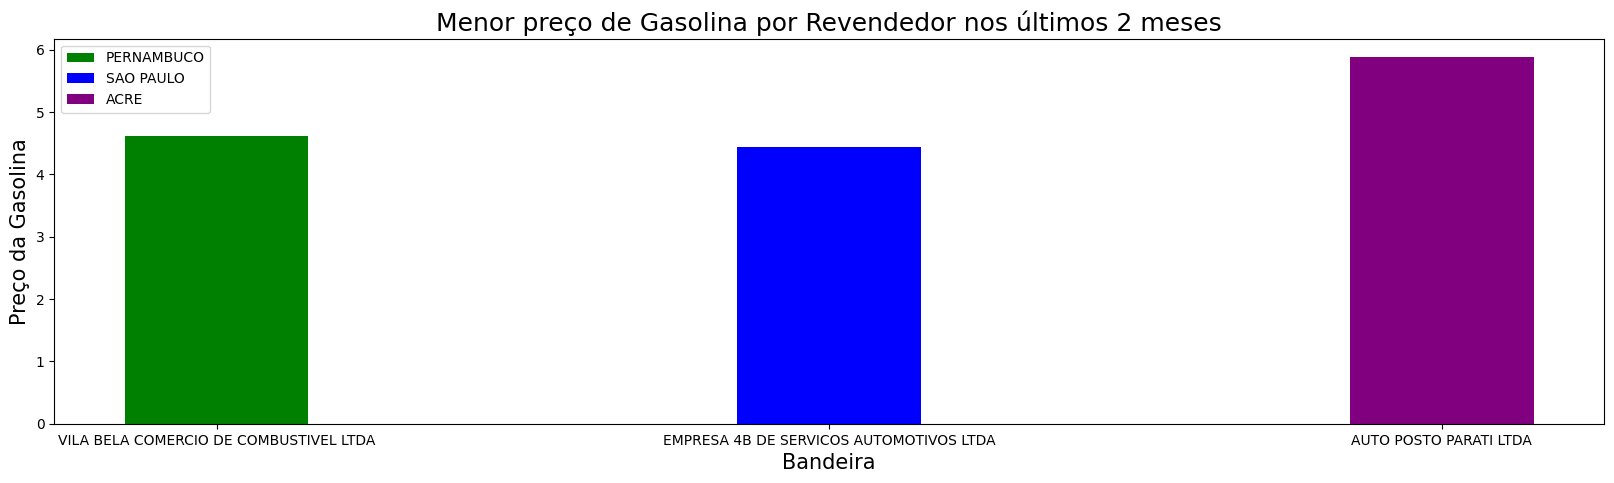

In [ ]:
# Gráficos e legendas
fig, ax = plt.subplots(figsize=(20, 5));
plt.xlabel('Bandeira', fontsize = 15)
plt.ylabel('Preço da Gasolina', fontsize = 15)
plt.title('Menor preço de Gasolina por Revendedor nos últimos 2 meses', fontsize = 18)

# Atribuindo os dados da Gasolina Aditivada
menor_gasolina_revenda = dados_pernambuco[dados_pernambuco['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda = menor_gasolina_revenda.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina = menor_gasolina_revenda.min()
plt.bar(menor_preco_revenda, menor_preco_gasolina, color='green', width=0.3, label = 'PERNAMBUCO') # Criação da barra

# Atribuindo os dados da Gasolina
menor_gasolina_revenda2 = dados_saopaulo[dados_saopaulo['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda2 = menor_gasolina_revenda2.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina2 = menor_gasolina_revenda2.min()
plt.bar(menor_preco_revenda2, menor_preco_gasolina2, color='blue', width=0.3, label = 'SAO PAULO') # Criação da barra

# Atribuindo os dados da Gasolina
menor_gasolina_revenda3= dados_acre[dados_acre['Produto'] == 'GASOLINA'].groupby('Revenda')['Valor de Venda'].min()
menor_preco_revenda3 = menor_gasolina_revenda3.idxmin() # Buscando o maior valor nos dados da Gasolina Aditivada
menor_preco_gasolina3 = menor_gasolina_revenda3.min()
plt.bar(menor_preco_revenda3, menor_preco_gasolina3, color='purple', width=0.3, label = 'ACRE') # Criação da barra

plt.legend()
plt.show()